In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
from Models import Perceptron

In [2]:
X, y = make_moons(n_samples=1000, noise=0.1, random_state=1)
X

array([[ 0.13194154,  0.34044556],
       [ 1.4002532 , -0.55948511],
       [-0.85541894,  0.14394603],
       ...,
       [ 1.82520541,  0.05908512],
       [ 0.1450874 ,  0.87538833],
       [ 1.11417213,  0.3312424 ]])

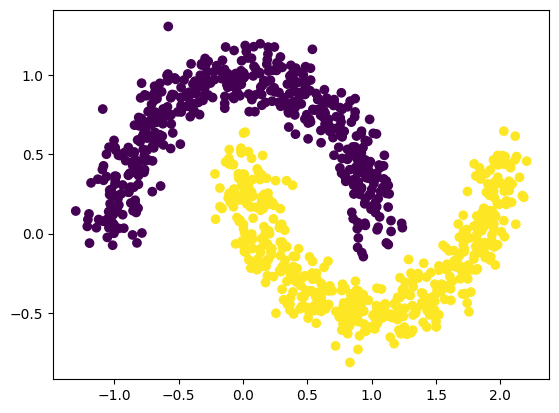

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [4]:
# split the data into train and test
train_inputs = X[:800]
train_labels = y[:800]

test_input = X[800:]
test_labels = y[800:]

In [5]:
model = Perceptron(4)
model_input = np.array([np.array([i[0], i[1], np.square(i[0]), np.power(i[0], 3)]) for i in train_inputs])
# print(model_input)
model.train(model_input, train_labels, epochs=10, learning_rate=0.01)

Epoch: 0, Error: 61
Epoch: 1, Error: 26
Epoch: 2, Error: 6
Epoch: 3, Error: 8
Epoch: 4, Error: 4
Epoch: 5, Error: 9
Epoch: 6, Error: 3
Epoch: 7, Error: 7
Epoch: 8, Error: 0
Epoch: 9, Error: 0


In [6]:
model_input = np.array([np.array([i[0], i[1], np.square(i[0]), np.power(i[0], 3)]) for i in test_input])
predicted = model.predict(model_input)

accuracy = np.sum(predicted == test_labels) / len(test_labels)
print(accuracy)


1.0


1 [ 0.06       -0.05342917 -0.08721575 -0.11252818  0.09240102]


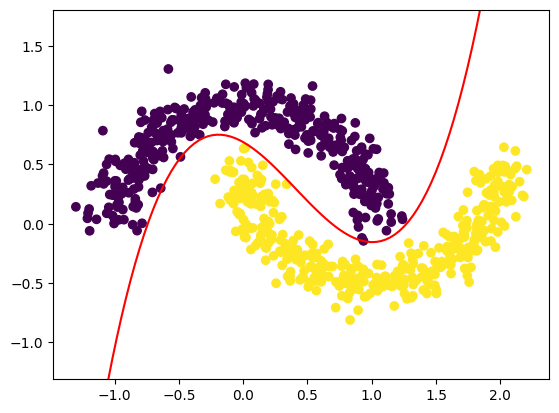

In [7]:
plt.scatter(train_inputs[:,0], train_inputs[:,1], c=train_labels)
x = np.linspace(train_inputs[:,0].min() , train_inputs[:,0].max(), 100)

w = model.get_weights()
b = model.get_bias()

y = [-w[1] * i - w[3] * np.square(i) - w[4] * np.power(i, 3) - w[0] * b  for i in x] / w[2]


print(b, w)

plt.plot(x, y, 'r-')
plt.ylim(train_inputs[:,1].min() - 0.5, train_inputs[:,1].max() + 0.5)

plt.show()